In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [4]:
path = "C:/Users/Darwin/Desktop/hackII/"
files_list = os.listdir(path + "/all_frames_5m6b/")
images = np.asarray([np.load(path + "/all_frames_5m6b/" + file) for file in files_list])
labels = np.asarray([np.load(path + "/all_masks_5m6b/" + file) for file in files_list])

In [5]:
images.shape

(5028, 128, 128, 6)

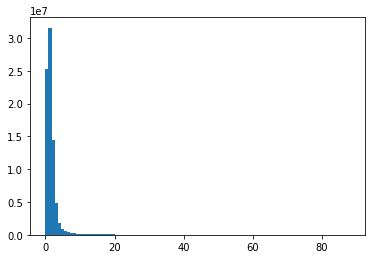

In [11]:
plt.hist(images[:,:,:,0].flatten(),bins=100)
plt.show()

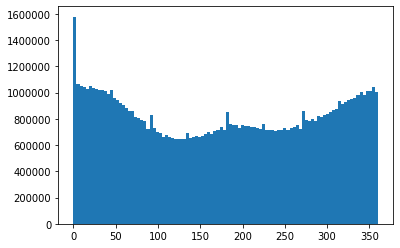

In [12]:
plt.hist(images[:,:,:,1].flatten(),bins=100)
plt.show()

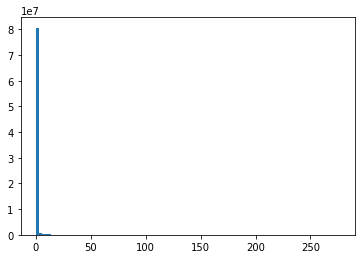

In [13]:
plt.hist(images[:,:,:,2].flatten(),bins=100)
plt.show()

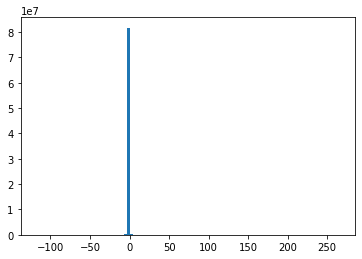

In [14]:
plt.hist(images[:,:,:,3].flatten(),bins=100)
plt.show()

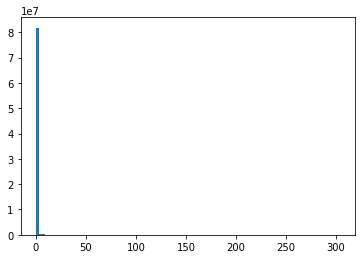

In [15]:
plt.hist(images[:,:,:,4].flatten(),bins=100)
plt.show()

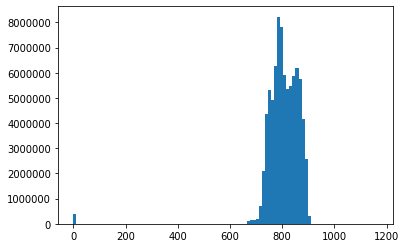

In [16]:
plt.hist(images[:,:,:,5].flatten(),bins=100)
plt.show()

In [ ]:
plt.imshow(images[0], cmap="gray")
plt.show()

In [ ]:
freq = np.unique(images.flatten(),return_counts=True)
freq

In [ ]:
freq[0][-100:],freq[1][-100:]

In [ ]:
403487/(5028*128*128) # percentage of zeros

In [ ]:
images[images == 0] = np.nan # gets rid of zeros

In [ ]:
plt.imshow(images[0], cmap="gray")
plt.show()

In [ ]:
plt.hist(images.flatten(),bins=200)
plt.show()

In [ ]:
import scipy.stats

scipy.stats.probplot(images.flatten(), plot=plt)
plt.show()

In [ ]:
np.nanmin(images), np.nanmax(images)

In [ ]:
np.nanmean(images), np.nanstd(images)

In [ ]:
images = (images - 800) / 50 # normalize

In [ ]:
images = 0.1 + 0.9 * (images - np.nanmin(images)) / (np.nanmax(images) - np.nanmin(images))

In [ ]:
plt.hist(images.flatten(),bins=100)
plt.show()

In [ ]:
images[np.isnan(images)] = 0 # reintroduce zeros

In [ ]:
images.mean(), images.std()

In [ ]:
np.unique(labels[0],return_counts=True)[1][1]/16384

In [ ]:
1136328/(16384*5028)

In [ ]:
shuffle = np.random.permutation(images.shape[0]) # generate shuffle

In [ ]:
# shuffle
np.take(images, shuffle, axis=0, out=images)
np.take(labels, shuffle, axis=0, out=labels)

In [ ]:
images.shape[0]

In [ ]:
(int)(images.shape[0]*0.8)

In [ ]:
train_images = tf.data.Dataset.from_tensor_slices(images[4022:])
train_labels = tf.data.Dataset.from_tensor_slices(labels[4022:])
test_images = tf.data.Dataset.from_tensor_slices(images[4022:])
test_labels = tf.data.Dataset.from_tensor_slices(labels[4022:])